In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import iop_ext as iop #artem stuff

***DEFINE CONSTANTS - EXOPLANET OF INTEREST: Kepler 80-d***

In [13]:
Lsun = 3.846e26 #Luminosity of the Sun in W
Msun = 1.9891e30 #Mass of the Sun in KG
Mearth = 5.97219e24 #Mass of Earth in KG
Rearth = 6.371e6 #Radius of Earth in m
au = 1.49598e11 #AU in m
yr = 3600*24*365 #Year to Seconds converter
a0 = 0.5 #Slope of LHE (high energy luminosity)
tsat = 1.0e8*yr #Duration of saturation phase
G = 6.67e-11 #Universal gravitational constant
pi = np.pi #pi

#PLANET: Go to NEA and input an exoplanets data in the following:
Lstar = Lsun*10**-0.7450092
Mstar = Msun*0.73
Teq = 720
a = au*0.0372
x0 = 0.5 #Initial WMF
CMFprime = 0.325 #Reduced CMF
Lsat = (10**(-3.5))*Lsun*(Mstar/Msun) #LHE During the saturation phase

***INITIALIZE VARIABLES***

In [14]:
t = 1e6 * yr #1 million years to seconds
M0 = 6.75 * Mearth #Initial mass of Planet
Mp = M0 #initialize the mass
x = x0

***DEFINE FUNCTIONS***

In [15]:
def RpFunction(CMF, x, Teq, Mp): #Function to find radius of planet in m (CMF, WMF, Teq, Mp)
    radius = iop.radius_iop(CMF, x, Teq, Mp/Mearth) #thank you artem for the heavy lifting :D
    return radius*Rearth

def nFunction(Mp, Rp): #N is the efficiency parameter (Greek letter) how much energy is converted to mass loss
    vesc = ((2*G*Mp)/(Rp))**(1/2) #Escape velocity of the planet
    n = 0.1*((vesc/15)**-2)
    return n

def LheFunction(t): #LHE
    if (t<tsat):
        return Lsat
    else:
        Lhe = Lsat*((t/tsat)**(-1-a0))
        return Lhe

def mFunction(Mp, Rp, t): #Time derivative of Mp in kg/s lost
    Lhe = LheFunction(t)
    n = nFunction(Mp, Rp)
    m_loss = (n*(((pi)*(Rp**3)*(Lhe))/(4*(pi)*(a**2)*(G)*(Mp))))
    return m_loss #[(m*1e9*yr)/Mearth] to return mass in Earthmass per billion years


def xwmfFunction(Mp): #xwmf = WMF
    x = (M0*x0-M0+Mp)/Mp
    return x 

R0 = RpFunction(CMFprime, x, Teq, Mp)

***EVOLUTION***

Starting time 1000000.00 years, Mass 6.750000 M_earth, Radius 2.467746 R_earth, WMF: 0.500000, Mass Loss Rate: 6.813856e+01 kg/s
4.0312282500000006e+25
4.031228249785119e+25
Iteration 1: Time 2000000.00 years, Mass 6.7500000 M_earth, Radius 2.4677459 R_earth, WMF: 0.50000000, Mass Loss Rate: 6.813856e+01 kg/s
4.031228249785119e+25
4.0312282495702375e+25
Iteration 2: Time 3000000.00 years, Mass 6.7500000 M_earth, Radius 2.4677459 R_earth, WMF: 0.50000000, Mass Loss Rate: 6.813856e+01 kg/s
4.0312282495702375e+25
4.031228249355356e+25
Iteration 3: Time 4000000.00 years, Mass 6.7500000 M_earth, Radius 2.4677459 R_earth, WMF: 0.50000000, Mass Loss Rate: 6.813856e+01 kg/s
4.031228249355356e+25
4.0312282491404745e+25
Iteration 4: Time 5000000.00 years, Mass 6.7500000 M_earth, Radius 2.4677459 R_earth, WMF: 0.50000000, Mass Loss Rate: 6.813856e+01 kg/s
4.0312282491404745e+25
4.031228248925593e+25
Iteration 5: Time 6000000.00 years, Mass 6.7500000 M_earth, Radius 2.4677459 R_earth, WMF: 0.50000

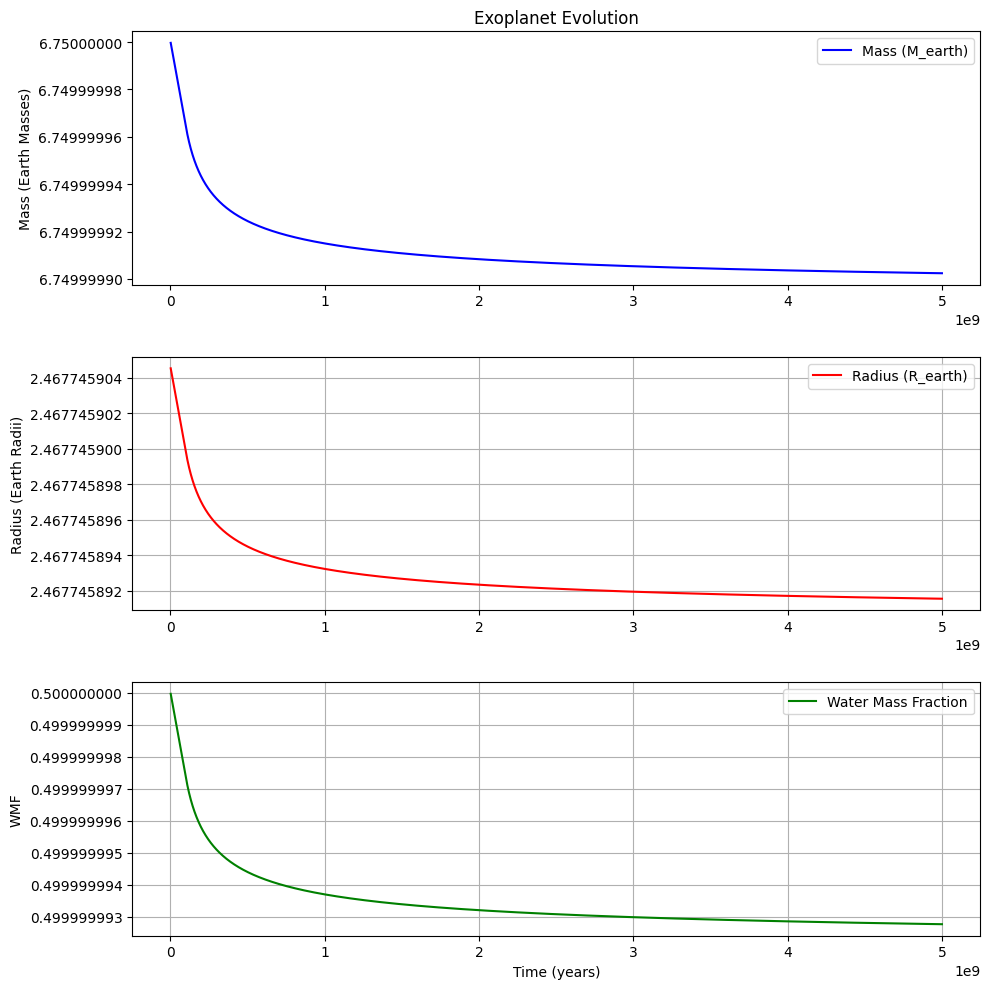

In [24]:
# Start with 1 million years
t = 1e6 * yr
deltat = 1e6 * yr  # Increment by 1 million years

Mp = M0
Rp = RpFunction(CMFprime, x0, Teq, M0)
m_loss = mFunction(Mp, Rp, t)

print(f"Starting time {t/yr:.2f} years, Mass {M0/Mearth:.6f} M_earth, Radius {R0/Rearth:.6f} R_earth, WMF: {x0:.6f}, Mass Loss Rate: {m_loss:.6e} kg/s")

iteration = 0  

time_list = []    # time in years
mass_list = []    # planet mass in Earth masses
radius_list = []  # planet radius in Earth radii
wmf_list = []     # water mass fraction

while (t < (5 * 1e9 * yr)):  # Run until 5 billion years 
    iteration += 1
    print(Mp)
    Mp -= m_loss*deltat  # Now update Mp using the newly computed m
    print(Mp)
    x = xwmfFunction(Mp)  # Update WMF
    Rp = RpFunction(CMFprime, x, Teq, Mp)  # Update radius
    t += deltat
    m_loss_new = mFunction(Mp, Rp, t)
    m_loss = m_loss_new
    
    time_list.append(t/yr)
    mass_list.append(Mp/Mearth)
    radius_list.append(Rp/Rearth)
    wmf_list.append(x)

    # Print every iteration
    print(f"Iteration {iteration}: Time {t/yr:.2f} years, Mass {Mp/Mearth:.7f} M_earth, Radius {Rp/Rearth:.7f} R_earth, WMF: {x:.8f}, Mass Loss Rate: {m_loss:.6e} kg/s")

print("Evolution loop complete.")  

plt.figure(figsize=(10, 10))

# Plot Mass Evolution
plt.subplot(3, 1, 1)
plt.plot(time_list, mass_list, 'b-', label="Mass (M_earth)")
plt.ylabel("Mass (Earth Masses)")
plt.title("Exoplanet Evolution")
plt.legend()

plt.ticklabel_format(useOffset=False)

# Plot Radius Evolution
plt.subplot(3, 1, 2)
plt.plot(time_list, radius_list, 'r-', label="Radius (R_earth)")
plt.ylabel("Radius (Earth Radii)")
plt.legend()
plt.grid(True)
plt.ticklabel_format(useOffset=False)

# Plot Water Mass Fraction Evolution
plt.subplot(3, 1, 3)
plt.plot(time_list, wmf_list, 'g-', label="Water Mass Fraction")
plt.xlabel("Time (years)")
plt.ylabel("WMF")
plt.legend()
plt.grid(True)
plt.ticklabel_format(useOffset=False)

plt.tight_layout()
plt.show()